In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/test (2).csv")

In [4]:
df.head()


,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


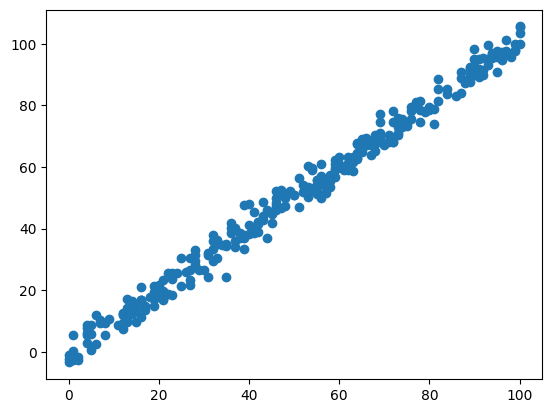

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df.x,df.y)

In [18]:
X = df.iloc[:,0]

In [19]:
X

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


In [21]:
y = df.iloc[:,1]
y

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
X_train

,x
66,41
163,16
205,13
53,31
246,68
...,...
75,28
22,89
72,79
15,15


In [26]:
y_test

,y
98,70.349698
259,38.677808
184,34.124732
256,92.402177
29,26.591124
254,64.832963
7,97.617937
13,61.388007
230,40.007096
91,38.430764


In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [31]:
lr.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

The reason we only need to reshape X_train is because of how scikit-learn models are designed to handle input data.

X_train (Features): This represents your independent variables or features that you are using to predict the target. Scikit-learn models expect the features to be in a 2-dimensional array-like structure, where each row is a sample and each column is a feature. Even if you only have one feature (as in this case with your 'x' column), it still needs to be represented as a 2D array with a single column. The .reshape(-1, 1) operation does exactly this, converting the 1D Series into a 2D array with one column.
y_train (Target): This represents your dependent variable or the target you are trying to predict. Scikit-learn models can accept the target variable as a 1-dimensional array or Series. Since y_train is already a pandas Series (which is 1D), it's in the expected format for the target variable, so no reshaping is needed.
In summary, the reshaping is required for the input features (X_train) to match the expected 2D format of scikit-learn models, while the target variable (y_train) is correctly formatted as a 1D Series.



In [32]:
lr.predict(X_test.values.reshape(-1,1))

array([73.55680167, 35.97535099, 36.99106587, 89.8082398 , 26.83391704,
       65.4310826 , 95.9025291 , 62.38393795, 36.99106587, 38.00678075,
       59.3367933 , 19.72391285, 99.96538863, 46.13249982, 97.93395887,
       40.03821052, 31.91249145, 71.5253719 , 11.59819379, 60.35250819,
       47.1482147 , 19.72391285, 56.28964865, 31.91249145, 55.27393377,
       43.08535517, 90.82395468, 91.83966957, 76.60394632, 24.80248727,
       75.58823143, 75.58823143,  7.53533426, 46.13249982, 58.32107842,
        0.42533007, 30.89677657, 61.36822307, 14.64533844, -0.59038481,
       21.75534262, 17.69248309, 71.5253719 , 18.70819797,  0.42533007,
       92.85538445, 64.41536772, 66.44679749, 69.49394214, 36.99106587,
       74.57251655, 56.28964865, 27.84963192, 22.7710575 , 31.91249145,
        3.47247472,  6.51961937, 57.30536354, 88.79252492, 16.6767682 ])

In [33]:
lr.predict([[10]])

array([9.56676402])

In [34]:
lr.coef_

array([1.01571488])

In [35]:
lr.intercept_

np.float64(-0.5903848106624352)